## Общая информация

дата сбора статистики: 14 ноября 2017

время последнего диалога:

время первого диалога:

всего диалогов:

всего юзеров:

диалогов на среднестатистического юзера:

максимальное число диалогов на юзера: 743

это за период с 28 июня по 14 ноября 2017 года (139 дней)

то есть 5.35 диалогов в сутки

In [149]:
# Python2
from os import listdir
from os.path import isfile, join
import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)


In [2]:
init_path = 'csv_histories'
group_id = 145254340

In [37]:
group_data = pd.read_csv(join(init_path, '{}.csv'.format(group_id)))

In [38]:
# group_ids = [int(re.split('\.', f)[0]) for f in listdir(init_path) if isfile(join(init_path, f))]
# for group_id in group_ids:
group_data.loc[:,'text'] = group_data.loc[:,'text'].str.decode('utf-8').str.lower()
keys = group_data['is_income'] == 1
group_data.loc[keys,'text'] = group_data[keys]['text'].str.slice(13)
group_data.head()

,user_id,dialog_number,message_number,text,is_income
0,402472964,0,0,приветствую,1
1,402472964,0,1,здрастееэээ?,1
2,402472964,0,2,эм...,1
3,402472964,0,3,мммм...,1
4,402472964,0,4,ты на связи?,1


In [ ]:
#group_data['dialog_count'] = group_data.groupby('user_id').agg({'dialog_number': lambda x: np.max(x) + 1})

In [34]:
group_data.head()

,user_id,dialog_number,message_number,text,is_income,dialog_count
0,402472964,0,0,приветствую,1,NaN
1,402472964,0,1,здрастееэээ?,1,NaN
2,402472964,0,2,эм...,1,NaN
3,402472964,0,3,мммм...,1,NaN
4,402472964,0,4,ты на связи?,1,NaN


In [60]:
dialogs_count = group_data.groupby('user_id').agg({'dialog_number': lambda x: (np.max(x) + 1)})
dialogs_count = dialogs_count.sort_values('dialog_number', ascending=False).reset_index()
dialogs_count.head()

,user_id,dialog_number
0,422045523,743
1,160180977,565
2,409391325,420
3,392172223,382
4,416778326,327


In [ ]:
#sns.barplot(x=dialogs_count.user_id, y=dialogs_count.dialog_number)

In [120]:
dialogs_count_log = dialogs_count.copy()

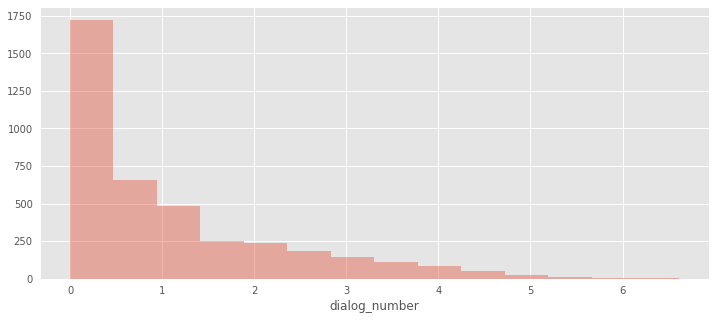

In [156]:
dialogs_count_log['dialog_number'] = dialogs_count['dialog_number'].apply(lambda x: np.log(x))
#dialogs_count_log.tail()
n_bins = 15
bins = np.linspace(dialogs_count_log.dialog_number.min(), dialogs_count_log.dialog_number.max(), n_bins)
#bins
sns.distplot(dialogs_count_log.dialog_number, kde=False, bins=bins)